# Jyro Python Robot Simulator

## Pure-Python simulator for robots.

In [1]:
from jyro.simulator import *
import math

In [2]:
sim = Physics()

In [3]:
def world(sim):
    sim.addBox(0, 0, 5, 5, fill="backgroundgreen", wallcolor="lightgrey") # meters
    sim.addBox(1, 1, 2, 2, "purple")
    ## brightness of 1 is radius 1 meter
    sim.addLight(4, 4, 2.25, color=Color(255, 255, 0, 64))

In [4]:
world(sim)

In [7]:
import random

class MyPioneer(Pioneer):
    def __init__(self, name, x, y, angle):
        Pioneer.__init__(self, name, x, y, angle)
        self.addDevice(PioneerFrontSonars(maxRange=1.0))
        #self.addDevice(Gripper())
        self.addDevice(PioneerFrontLightSensors(5))
        
    def brain(self):
        self.move(random.random() * 2 - 1, 
                  random.random() * 2 - 1)

In [8]:
robot = MyPioneer("Pioneer", 2.50, 4.50, math.pi / 2) # meters, radians

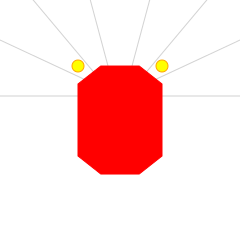

In [9]:
robot

In [10]:
sim.addRobot(robot)

In [11]:
canvas = SVGCanvas((250, 250))

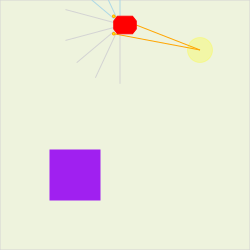

In [12]:
sim.draw(canvas)

In [11]:
#robot.setPose(4.5, 4.0, math.pi / 2)

In [12]:
robot.move(1, 1)

In [13]:
from IPython.display import display, clear_output

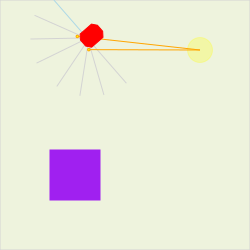

CPU times: user 456 ms, sys: 44 ms, total: 500 ms
Wall time: 6.42 s


In [14]:
%%time

import time

for i in range(70):
    sim.step(run_brain=False)
    for r in sim.robots:
        sim.draw(canvas)
        clear_output(wait=True)
        display(canvas)
        time.sleep(.085) # sleep for a bit

In [15]:
robot.getPose()

(1.8312560941005205, 4.28695669992235, 2.287611019615305)

In [16]:
%%time

import numpy

light0 = numpy.zeros((100,100))
light1 = numpy.zeros((100,100))

robot.setPose(2.50, 4.50, math.pi / 2)
for i in range(70):
    sim.step(run_brain=False)
    for r in sim.robots:
        x, y, a = robot.getPose()
        light0[int(y/canvas.max_y * 100), int(x/canvas.max_x * 100)] = r.device["light"].scan[0]        
        light1[int(y/canvas.max_y * 100), int(x/canvas.max_x * 100)] = r.device["light"].scan[1]

CPU times: user 44 ms, sys: 8 ms, total: 52 ms
Wall time: 55.4 ms


70 steps * 0.1 seconds/step = 7 seconds

7 seconds / 85 ms

In [17]:
7 / .056

125.0

Looks like it simulates about 80 - 100 simulated seconds for every real second, or is 80 - 100 times faster than real life.

## Checking Light Readings

New simulated light sensors are 75% direct light and 25% ambient light.

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

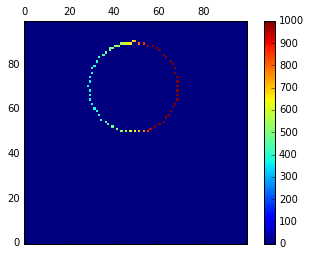

In [19]:
fig1 = plt.figure()
sp0 = fig1.add_subplot(111)
p0 = sp0.matshow(light0, origin="lower")
fig1.colorbar(p0)

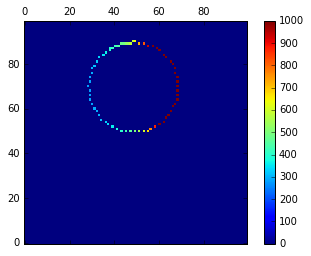

In [20]:
fig2 = plt.figure()
sp1 = fig2.add_subplot(111)
p1 = sp1.matshow(light1, origin="lower")
fig2.colorbar(p1)

## Differences between two light sensors

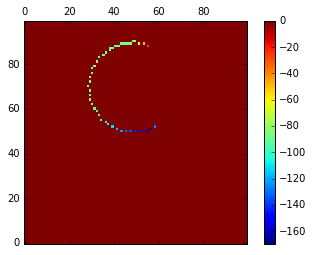

In [21]:
fig3 = plt.figure()
sp3 = fig3.add_subplot(111)
p3 = sp3.matshow(light1 - light0, origin="lower")
fig3.colorbar(p3)

In [22]:
def sampleLight(angle, resolution=50):
    light0 = numpy.zeros((resolution,resolution))
    light1 = numpy.zeros((resolution,resolution))

    for x in range(resolution):
        for y in range(resolution):
            for r in sim.robots:
                r.setPose(x/resolution * canvas.max_x, 
                          y/resolution * canvas.max_y, 
                          angle) 
                light0[y, x] = r.device["light"].scan[0]        
                light1[y, x] = r.device["light"].scan[1]
    fig = plt.figure()
    sp = fig.add_subplot(111)
    p = sp.matshow(light0, origin="lower")
    fig.colorbar(p)

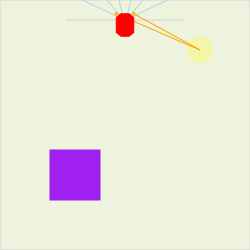

In [23]:
robot.setPose(2.5, 4.5, 0)
sim.draw(canvas)

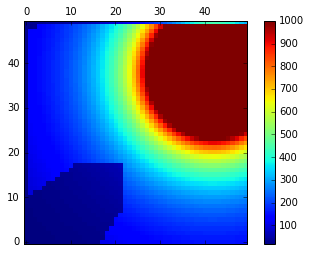

In [24]:
sampleLight(0) # face up, north

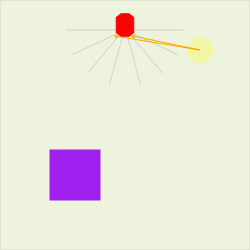

In [25]:
robot.setPose(2.5, 4.5, math.pi)
sim.draw(canvas)

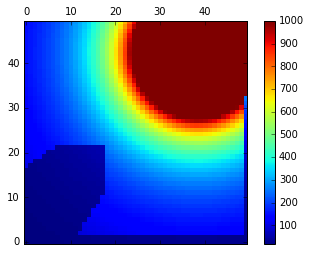

In [26]:
sampleLight(math.pi)

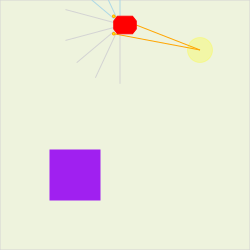

In [27]:
robot.setPose(2.5, 4.5, math.pi/2)
sim.draw(canvas)

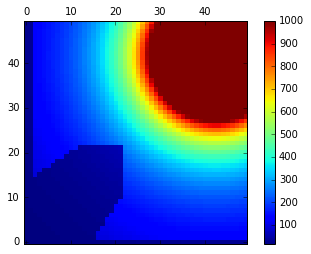

In [28]:
sampleLight(math.pi/2)

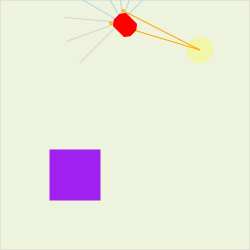

In [29]:
robot.setPose(2.5, 4.5, math.pi/4)
sim.draw(canvas)

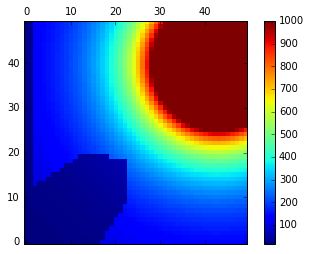

In [30]:
sampleLight(math.pi/4)

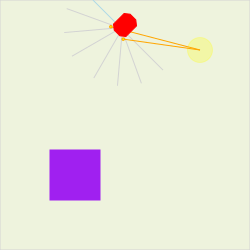

In [31]:
robot.setPose(2.5, 4.5, math.pi * 3/4)
sim.draw(canvas)

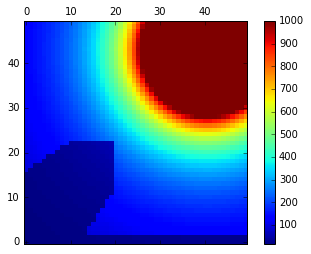

In [32]:
sampleLight(math.pi * 3/4)

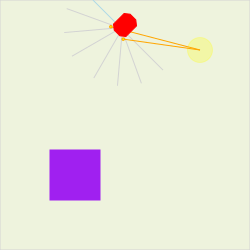

In [33]:
robot.setPose(2.5, 4.5, math.pi * 3/4)
sim.draw(canvas)

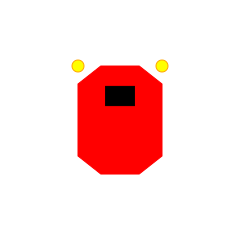

In [34]:
robot.addDevice(Camera(120, 80))

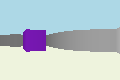

In [35]:
robot.device["camera"].getImage()

In [36]:
robot.move(0, .5)
for i in range(10):
    sim.step(run_brain=False)

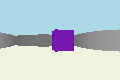

In [37]:
robot.device["camera"].getImage()

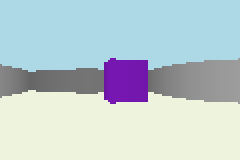

In [38]:
img = robot.device["camera"].getImage()
img = img.resize((240, 160))
img

In [39]:
vsim = VSimulator(robot, world)

In [42]:
robot.brain = lambda: robot.move(1,1)